In [149]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

#BertTokenizer
from transformers import BertTokenizer, PreTrainedTokenizer

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Activation, Dense, Dropout, Embedding, Flatten, LSTM, Bidirectional
from tensorflow.keras.layers import Flatten, Activation, RepeatVector, Permute, Multiply, Lambda
from tensorflow.keras.layers import Lambda, Conv1D, MaxPooling1D, TimeDistributed, Reshape, Concatenate
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import backend as K

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
print(logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO))

None


In [150]:
# nltk.download('stopwords')
# %pip install demoji
# import demoji 
  
# demoji.download_codes() 
!pip install emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
ps = PorterStemmer()
wnl = WordNetLemmatizer()

Defaulting to user installation because normal site-packages is not writeable


In [151]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), text)
#         text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
# Example
text = "Hello :-) :-) - :D - :( - ;D"
print(convert_emoticons(text))
# ps.stem("fgjdgf")

Hello Happy face smiley Happy face smiley - Laughing big grin or laugh with glasses - Frown sad andry or pouting - Wink or smirk


In [4]:
# demoji.findall("hi :)")

{}

In [152]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
# SEQUENCE_LENGTH = 300
# SEQUENCE_LENGTH = 20
# SEQUENCE_LENGTH = 40
SEQUENCE_LENGTH = 30
EPOCHS = 8
# WORD_LENGTH = 30
WORD_LENGTH = 16

# EPOCHS = 4
BATCH_SIZE = 128

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)


In [15]:
dataset_path = r"training.1600000.processed.noemoticon.csv"
df_total = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [153]:
print("Dataset size:", len(df_total))

Dataset size: 1600000


In [154]:
df_total.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [155]:
# df = df_total.iloc[0:50000, :]
# df = df_total
import random

def some(x, n):
    return x.iloc[np.random.randint(0, len(x), n)]

# df_pos = df_total.iloc[0:int(len(df_total)/2), :]
# df_neg = df_total.iloc[int(len(df_total)/2): len(df_total), :]

# df = df_total.iloc[0:10000, :]
# df2 = df_total.iloc[-10000:, :]
# df = some(df_pos, 100000)
# df2 = some(df_neg, 100000)
# df = some(df_pos, 200000)
# df2 = some(df_neg, 200000)
# df = some(df_pos, 400000)
# df2 = some(df_neg, 400000)
# df = df.append(df2, ignore_index=True)
df = df_total.sample(frac=1)
print(len(df))

1600000


In [156]:
df.head(5)

,target,ids,date,flag,user,text
7365,0,1469785214,Tue Apr 07 07:24:47 PDT 2009,NO_QUERY,Janoita,"@J44SS Meany, you got me all excited for 90210..."
784712,0,2324237108,Thu Jun 25 02:38:45 PDT 2009,NO_QUERY,sprinkles_,@knitwits1 in pain swilling my mouth out in s...
689123,0,2251688356,Sat Jun 20 04:16:57 PDT 2009,NO_QUERY,taasshhh,we lost by 2!! So sad
581616,0,2214341530,Wed Jun 17 16:36:22 PDT 2009,NO_QUERY,spiritxwolf,cant sleep so is going old school retro gamin...
1199932,4,1985402076,Sun May 31 17:02:07 PDT 2009,NO_QUERY,xoxomimi95,ASK ROB IF HES DATING KRISTEN I WANNA SEE IF T...


In [157]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
#     try:
#         res = decode_map[int(label)]
#     except:
#         print(label)
    return decode_map[int(label)]

In [158]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 527 ms, sys: 15.6 ms, total: 543 ms
Wall time: 540 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

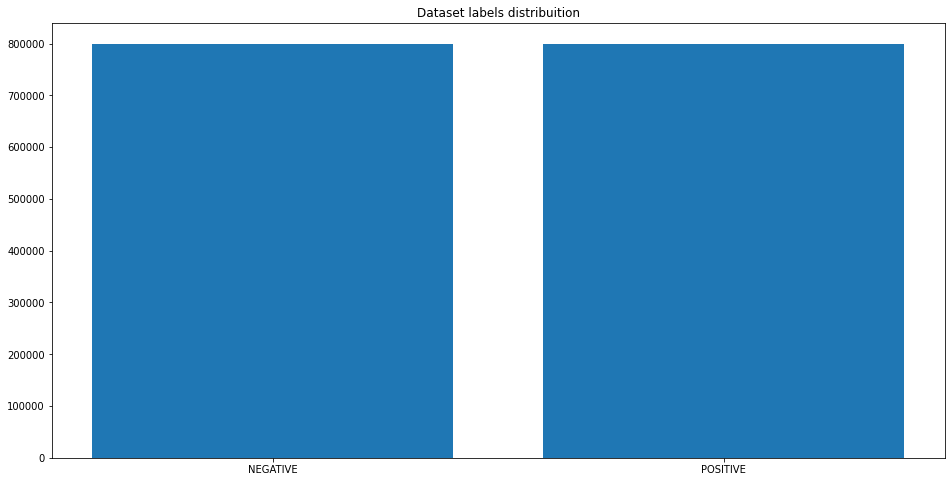

In [159]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [23]:
stop_words = stopwords.words("english")
# print(stop_words)
# stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
#               "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
#               'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
#               'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
#               "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 
#               'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
#               'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'to', 'from', 'in', 
#               'out', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
#               'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'other', 'some', 'such', 
#               'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
#               'just', 'don', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma']

stop_words = [w for w in nltk.corpus.stopwords.words('english') if not (w.startswith("no") and w.endswith("n't"))]
stop_words.append("now")
stop_words += ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
stop_words += ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
stop_words += ["ms", "mr", "mrs"]
# print(stop_words)
stemmer = SnowballStemmer("english")

In [24]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer_large = BertTokenizer.from_pretrained('bert-large-uncased')
from transformers import XLNetTokenizer
xl_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
# xl_tokenizer_large = XLNetTokenizer.from_pretrained("xlnet-large-cased")
# from transformers import DistilBertTokenizer
# distil_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


from nltk.tokenize import TweetTokenizer 
  
tweet_tokenizer = TweetTokenizer() 
# tokenizer = PreTrainedTokenizer.from_pretrained('bert-base-uncased')

In [25]:
def word_tokenize(w):
    w = w.lower()
    xl_w = xl_tokenizer.tokenize(w)
    bert_w = bert_tokenizer.tokenize(w)
    if(len(xl_w)-1 < len(bert_w)):
        text = " ".join([ps.stem(w) for w in xl_w])
    else:
        text = " ".join([ps.stem(w) for w in bert_w])
#     print(text)
    text = re.sub("[▁#]", "", text)
    return text

def sent_tokenize(s):
    s = re.sub("[^a-z ]", "", s)
    print(s)
    s_text = [word_tokenize(w) for w in s.split()]
    print(s_text)
    s = " ".join(s_text)
    s = re.sub("[▁#]", "", s)
    return s

In [26]:
from itertools import groupby 
def remove_all_consecutive(str1): 
    result_str = [] 
    word=""
    for (key,group) in groupby(str1): 
        if len(list(group))>1 and (key in ['d', 'e', 'f', 'g', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'z']):
            word+=key*2
        else:
            word+=key
    return word
remove_all_consecutive("haapppppy")

'happy'

In [27]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess(text, stem=False):
#     emoticons = [":)", ":-)", ":^)", "^_^", "(^^)", ":,-)", "8-)", "B-)", "o:-)", ":-D", "}:-)", ";)", ";-)", ":-*", ":-P", ":-!"]
    # Remove link,user and special characters
#     text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(r"http\S+", "", text)
#     print(text)
    text = convert_emoticons(text)
#     print(text)
    text = re.sub("[^A-Za-z ]", "", text)
    def word_convert(w):
        if w.startswith('#'):
            return word_tokenize(token)
        else:
            return ps.stem(remove_all_consecutive(w))
    tokens = [word_convert(token) for token in text.split()]
    tokens = " ".join(tokens)
    tokens = [token for token in tokens.split() if (token not in stop_words) and len(token)>1]
    return " ".join(tokens)


In [28]:

print(ps.stem("haaaaaaaaaaaappy"))
print(tweet_tokenizer.tokenize("haaaaaaapy"))
print("DUP_processed:", preprocess("shoulda got haaaaaaaaaaaappyyyyyyyy gap ->  :)  - ^_^"))

str1 = 'xxxxxyyyyy'
print("Original string:" + str1)
print("After removing consecutive duplicates: " + str1)
print(remove_all_consecutive(str1))

for d in df_pos['text']:
    print(d)
    print(preprocess(d))
    break

haaaaaaaaaaaappi
['haaaaaaapy']
DUP_processed: shoulda got happi gap happi face smiley joy
Original string:xxxxxyyyyy
After removing consecutive duplicates: xxxxxyyyyy
xy
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
switchfoot Aw bummer shoulda got david carr third day wink smirk


In [29]:
%%time
# df_proc = df.text.apply(lambda x: preprocess(x))
# df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 1min 42s, sys: 530 ms, total: 1min 43s
Wall time: 1min 42s


In [160]:
# df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
df_train = df.head(640000)
df_test =  df.tail(320000)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))


TRAIN size: 640000
TEST size: 320000


In [161]:
%%time
df_train.text = df_train.text.apply(lambda x: preprocess(x))
df_test.text = df_test.text.apply(lambda x: preprocess(x))

/home/debabrata/.local/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


CPU times: user 8min 15s, sys: 1.13 s, total: 8min 16s
Wall time: 8min 15s


In [162]:
df_train.head()

,target,ids,date,flag,user,text
7365,NEGATIVE,1469785214,Tue Apr 07 07:24:47 PDT 2009,NO_QUERY,Janoita,JS meani got excit today cha
784712,NEGATIVE,2324237108,Thu Jun 25 02:38:45 PDT 2009,NO_QUERY,sprinkles_,knitwit pain swill mouth salt water ew
689123,NEGATIVE,2251688356,Sat Jun 20 04:16:57 PDT 2009,NO_QUERY,taasshhh,lost So sad
581616,NEGATIVE,2214341530,Wed Jun 17 16:36:22 PDT 2009,NO_QUERY,spiritxwolf,cant sleep go old school retro game play stree...
1199932,POSITIVE,1985402076,Sun May 31 17:02:07 PDT 2009,NO_QUERY,xoxomimi95,ask rob IF date kristen wana SE IF rumor true ...


In [32]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('../../ADL/project 1/GoogleNews-vectors-negative300.bin', binary=True)

2021-01-20 23:30:29,335 : INFO : loading projection weights from ../../ADL/project 1/GoogleNews-vectors-negative300.bin
2021-01-20 23:30:51,154 : INFO : loaded (3000000, 300) matrix from ../../ADL/project 1/GoogleNews-vectors-negative300.bin


In [163]:
NB_WORDS =  100000
# NB_WORDS = 8000

In [164]:
%%time
tokenizer = Tokenizer(num_words=NB_WORDS, filters='\t\n', oov_token="OOV")
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 344738
CPU times: user 5.73 s, sys: 80.1 ms, total: 5.81 s
Wall time: 5.79 s


In [165]:
print(len(df_train.text))
print(df_train.text[0:2])
print(df.text[12113])
# print(x_train[1])
print(tokenizer.texts_to_sequences([df.text[12113]]))

640000
7365                JS meani got excit today cha
784712    knitwit pain swill mouth salt water ew
Name: text, dtype: object
pjrea haha hope enjoy easter break doesnt last much longer
[[1, 55, 29, 153, 2690, 347, 158, 43, 42, 637]]


In [166]:
seq_lengths = df.text.apply(lambda x: len(x.split()))
seq_lengths.describe()

count    1.600000e+06
mean     1.000937e+01
std      6.015761e+00
min      0.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      5.800000e+01
Name: text, dtype: float64

In [226]:
word_lengths = df.text.apply(lambda x: [len(y) for y in x.split()])
list_word_lengths=[]
for word_ in word_lengths:
    for j in word_:
        list_word_lengths.append(j)
# print(word_lengths[0])
w_lengths = pd.Series(list_word_lengths).apply(lambda x: x)
print(w_lengths.describe())
# seq_lengths.describe()
# print(WORD_LENGTH)

count    1.601499e+07
mean     4.722069e+00
std      2.709923e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      3.580000e+02
dtype: float64


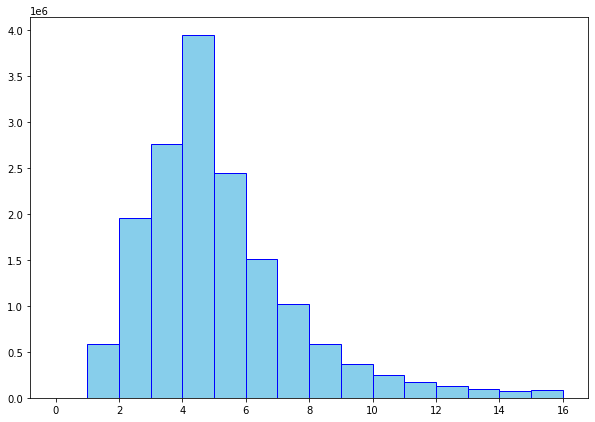

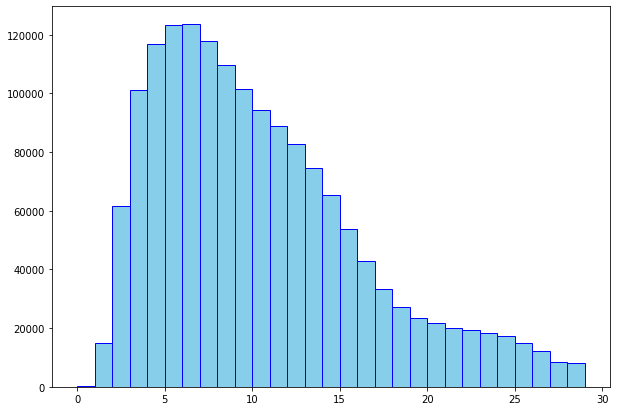

In [227]:
fig, ax = plt.subplots(figsize =(10, 7))  
ax.hist(list_word_lengths, bins = [i for i in range(17)], color = "skyblue", ec="blue")
plt.show() 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(seq_lengths, bins = [i for i in range(30)], color = "skyblue", ec="blue") 
# Show plot 
plt.show() 

In [167]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 11.6 s, sys: 660 ms, total: 12.3 s
Wall time: 12.3 s


In [223]:
%%time
# convert_df_train = df.text.apply(lambda x: np.pad(np.asarray(x.split()), (0, SEQUENCE_LENGTH - len(x)), 'constant'))
char_dict = {}
import string

for ch in string.printable:
    char_dict[ch]=0

def count_chars(x):
    for word in x:
        for char in word:
            if char in char_dict:
                char_dict[char]+=1
            else:
                char_dict[char]=1
# df.text.apply(count_chars)
charToInd={}
indToChar={}

for i, k in enumerate(char_dict):
    charToInd[k]=i+1
    indToChar[i+1]=k
    
# print(char_dict)
print(charToInd)
# print(indToChar)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
CPU times: user 971 µs, sys: 0 ns, total: 971 µs
Wall time: 894 µs


In [40]:
def wordToChar(x):
    sent_list = []
    def return_word(word):
        if(len(word)>WORD_LENGTH):
            word = word[:WORD_LENGTH]
        return np.pad(np.asarray([charToInd[ch] for ch in word]), (0, WORD_LENGTH - len(word)), 'constant')
#     print(len(x.split()))
    try:
        sent_list = list(map(return_word, x.split()[0:SEQUENCE_LENGTH]))
    except:
        print(len(x.split()))
        print(x)
    if(len(sent_list)<SEQUENCE_LENGTH):
        sent_list = sent_list+[[0]*WORD_LENGTH]*(SEQUENCE_LENGTH-len(sent_list))
    return np.asarray(sent_list)

In [169]:
df_train.text.shape

(640000,)

In [170]:
%%time
# np_df_train = np.asarray(df_train.text)
x_train_char = np.asarray(list(map(wordToChar, df_train.text)))
# np_df_test = np.asarray(df_test.text)
x_test_char = np.asarray(list(map(wordToChar, df_test.text)))

CPU times: user 3min 56s, sys: 3.73 s, total: 4min
Wall time: 3min 58s


In [171]:
print(x_train_char.shape)
print(x_train_char[2].shape)
print(x_train_char[2][0:10], "\n", df_train.text[2:3])
# print(wordToChar(df_train.text.to_string(index=False)[2])[0:10], df_train.text.to_string(index=False)[2])
print(x_test_char.shape)

(640000, 30, 16)
(30, 16)
[[22 25 29 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [55 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [29 11 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]] 
 689123    lost So sad
Name: text, dtype: object
(320000, 30, 16)


In [172]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [173]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (640000, 1)
y_test (320000, 1)


In [174]:
print("x_train", x_train.shape)
print(x_train_char.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print(x_test_char.shape)
print("y_test", y_test.shape)

x_train (640000, 30)
(640000, 30, 16)
y_train (640000, 1)

x_test (320000, 30)
(320000, 30, 16)
y_test (320000, 1)


In [175]:
y_train[:10]
# df_train.target[:10]
# df_train.text[2]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [176]:
# embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
embedding_matrix = np.zeros((NB_WORDS+1, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if i < NB_WORDS:
        if word in word2vec.vocab:
            embedding_matrix[i] = word2vec[word]
    else:
        break
print(embedding_matrix.shape)

(100001, 300)


In [46]:
import math
r_ch_emb = math.sqrt(6/(W2V_SIZE+100))
print(r_ch_emb)

0.1224744871391589


In [177]:
class Attention_Layer(layers.Layer):
    def __init__(self, units=1, initializer="normal", bias_initializer="zeros"):
        self.units = units
        self.initializer = initializer
        self.bias_initializer = bias_initializer
        self.att_initializer = tf.keras.initializers.RandomUniform()
        super(Attention_Layer, self).__init__()
    
    #define weights
    def build(self, input_shape):
        self.num_dim_perword = input_shape[-1]
        self.seq_length = input_shape[-2]
        self.v = self.add_weight(shape=(self.num_dim_perword, ), initializer=self.att_initializer, trainable=True,)
        self.dense_layer = tf.keras.layers.Dense(self.num_dim_perword)
        super(Attention_Layer, self).build(input_shape)
    
    def call(self, x):
        H = self.dense_layer(x)
        e = tf.einsum('...ij,...j->...i', H, self.v)
        e = Flatten()(e)
        
        a = Activation('softmax')(e)
        
        temp = RepeatVector(self.num_dim_perword)(a)
        temp = Permute([2,1])(temp)
        output = Multiply()([x,temp])
        output = Lambda(lambda values: K.sum(values, axis=1))(output)
        return output
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])


def CharEmbedding(maxlen):
    inp = Input(shape=(maxlen, ))
    initializer = tf.keras.initializers.RandomUniform(minval=-0.12, maxval=0.12, seed=None)
    char_embedding_layer = Embedding(len(charToInd)+1, W2V_SIZE, input_length=WORD_LENGTH, embeddings_initializer=initializer, trainable=True)
    x = char_embedding_layer(inp)
    kernel_sizes= [2, 3, 4, 5]
    kernel_filters = [40, 60, 70, 30]
    outs = []
    CHAR_DIM=0
    for i, k in enumerate(kernel_sizes):
        out = tf.keras.layers.Conv1D(filters=kernel_filters[i], kernel_size=k, padding="same")(x)
        out = tf.keras.layers.MaxPooling1D(pool_size=maxlen, strides=1, padding='valid')(out)
        outs.append(out)
        CHAR_DIM+=kernel_filters[i]
    outs = Concatenate(axis=-1)(outs)
    outs = Reshape((CHAR_DIM,))(outs)
    outs = Dense(55)(outs)
    
    lstm_x = Bidirectional(LSTM(20, dropout=0.01, recurrent_dropout=0.05))(x)
    outs = Concatenate(axis=-1)([outs, lstm_x])
    return Model(inp, outs)

In [178]:
APPEND_DIM = 100

In [179]:
# charEmbedLayer = CharEmbedding(WORD_LENGTH)
# print(charEmbedLayer.summary())

In [180]:
def SentEmbedding(maxlen):
    x = Input(shape=(maxlen, W2V_SIZE+APPEND_DIM))
    kernel_sizes= [2, 3, 4, 5, 6]
    kernel_filters = [80, 160, 100, 40, 20]
    outs = []
    SENT_DIM = 0
    for i, k in enumerate(kernel_sizes):
        out = tf.keras.layers.Conv1D(filters=kernel_filters[i], kernel_size=k, padding="same")(x)
        out = tf.keras.layers.MaxPooling1D(pool_size=maxlen, strides=1, padding='valid')(out)
        SENT_DIM += kernel_filters[i]
        outs.append(out)
    outs = Concatenate(axis=-1)(outs)
    outs = Reshape((SENT_DIM,))(outs)
    outs = Dense(160)(outs)
    return Model(x, outs)
    

In [181]:
def getModel(seqlen, wordlen):
    input_1 = Input(shape=(seqlen,))
    input_2 = Input(shape=(seqlen, wordlen,))
#     initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
#     embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)
    embedding_layer_1 = Embedding(NB_WORDS+1, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)
    embedding_layer_2 = Embedding(NB_WORDS+1, 5, input_length=SEQUENCE_LENGTH, trainable=True)
    x_word2vec_1 = embedding_layer_1(input_1)
    x_word2vec_2 = embedding_layer_2(input_1)
    
    charEmbedLayer = CharEmbedding(wordlen)
    x_char = TimeDistributed(charEmbedLayer)(input_2)
    x = Concatenate(axis=-1)([x_word2vec_1, x_word2vec_2, x_char])
    carry = Dense(400, activation='sigmoid')(x)
    transform = Dense(400, activation=tf.keras.activations.tanh)(x)
    x = carry*x+(1-carry)*transform
    x = Dropout(0.4)(x)
#     x = Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(x)
    x_lstm = Bidirectional(LSTM(70, return_sequences=True))(x)
    x_att = Attention_Layer()(x_lstm)
    x_sent = SentEmbedding(seqlen)(x)
    
    x = Concatenate(axis=-1)([x_sent, x_att])
    carry = Dense(300, activation='sigmoid')(x)
    transform = Dense(300, activation=tf.keras.activations.tanh)(x)
    x = carry*x+(1-carry)*transform
    
    x = Dense(300)(x)
    x = Dense(64)(x)
    out = Dense(1, activation='sigmoid')(x)
    
    model = Model([input_1, input_2], out)
    return model
    

In [195]:
mirrored_strategy = tf.distribute.MirroredStrategy(["GPU:2", "GPU:3"])

with mirrored_strategy.scope():
#     embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)
#     char_embedding_layer = Embedding(len(charToInd)+1, W2V_SIZE, input_length=WORD_LENGTH, trainable=True)
#     charEmbedLayer = CharEmbedding(WORD_LENGTH)
    model_dist = getModel(SEQUENCE_LENGTH, WORD_LENGTH)
    print(model_dist.summary())
    model_dist.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
    
#     model_dist = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


2021-01-21 02:49:29,993 : INFO : Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


2021-01-21 02:49:30,479 : WARNING : Layer lstm_27 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-01-21 02:49:30,487 : WARNING : Layer lstm_27 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-01-21 02:49:30,493 : WARNING : Layer lstm_27 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


Model: "functional_83"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_54 (InputLayer)           [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_55 (InputLayer)           [(None, 30, 16)]     0                                            
__________________________________________________________________________________________________
embedding_35 (Embedding)        (None, 30, 300)      30000300    input_54[0][0]                   
__________________________________________________________________________________________________
embedding_36 (Embedding)        (None, 30, 5)        500005      input_54[0][0]                   
______________________________________________________________________________________

In [192]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=1, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=1, restore_best_weights=True)]

In [228]:
# %%time
# history = model_dist.fit([x_train, x_train_char], y_train,
#                     batch_size=BATCH_SIZE,
# #                     epochs=EPOCHS,
#                     epochs=6,
#                     validation_split=0.1,
#                     verbose=1,
#                     callbacks=callbacks)

In [196]:
%%time
history = model_dist.fit([x_train, x_train_char], y_train,
                    batch_size=BATCH_SIZE,
#                     epochs=EPOCHS,
                    epochs=2,
                    validation_split=0.1,
                    verbose=1)
#                     callbacks=callbacks)

Epoch 1/2
4500/4500 [==============================] - 580s 129ms/step - loss: 0.4696 - accuracy: 0.7759 - val_loss: 0.4408 - val_accuracy: 0.7935
Epoch 2/2
4500/4500 [==============================] - 576s 128ms/step - loss: 0.4149 - accuracy: 0.8094 - val_loss: 0.4451 - val_accuracy: 0.7955
CPU times: user 40min 25s, sys: 2min 29s, total: 42min 54s
Wall time: 19min 36s


In [197]:
%%time
score = model_dist.evaluate([x_test, x_test_char], y_test, batch_size=BATCH_SIZE)
print(score)
print("ACCURACY:",score[1])
print("LOSS:",score[0])

2500/2500 [==============================] - 94s 38ms/step - loss: 0.4465 - accuracy: 0.7933
[0.4465339481830597, 0.7933499813079834]
ACCURACY: 0.7933499813079834
LOSS: 0.4465339481830597
CPU times: user 3min 51s, sys: 27.3 s, total: 4min 18s
Wall time: 1min 36s


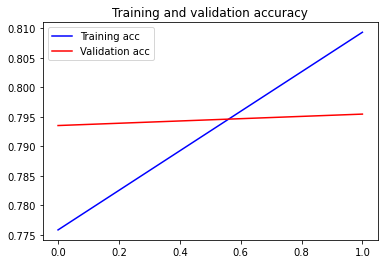

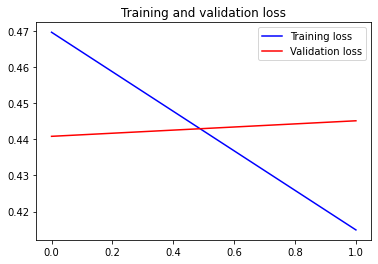

In [198]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
# plt.savefig('tv_acc_32K.png', bbox_inches='tight')

 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.savefig('tv_loss_32K.png', bbox_inches='tight')

 
plt.show()

In [199]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [207]:
def predict(text, include_neutral=False):
    start_at = time.time()
    # Tokenize text
    x_t = pad_sequences(tokenizer.texts_to_sequences([preprocess(text)]), maxlen=SEQUENCE_LENGTH)
    
#     np_df_test = np.asarray(df_test.text)
    x_t_char = np.asarray(list(map(wordToChar, [text])))
    # Predict
#     print(x_t, x_t_char)
    x_t = np.concatenate((x_test[0:BATCH_SIZE+1], x_t), axis=0)
    x_t_char = np.concatenate((x_test_char[0:BATCH_SIZE+1], x_t_char), axis=0)
    score = model_dist.predict([x_t, x_t_char], verbose=1, batch_size=BATCH_SIZE)[-1]
#     print(score)
#     score = model_dist.predict([x_test, x_test_char])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [208]:
predict("I love the music") #12345

2/2 [==============================] - 0s 22ms/step


{'label': 'POSITIVE',
 'score': 0.9895184636116028,
 'elapsed_time': 0.2849550247192383}

In [209]:
predict("I hate the rain") #12345

2/2 [==============================] - 0s 19ms/step


{'label': 'NEGATIVE',
 'score': 0.012774350121617317,
 'elapsed_time': 0.23687481880187988}

In [210]:
predict("i thought it would be good, but it's not") #1-34

2/2 [==============================] - 0s 21ms/step


{'label': 'NEGATIVE',
 'score': 0.42482614517211914,
 'elapsed_time': 0.24492383003234863}

In [211]:
predict("was that really good??? but in my opinion it's bad") #--23

2/2 [==============================] - 0s 18ms/step


{'label': 'NEGATIVE',
 'score': 0.2860795259475708,
 'elapsed_time': 0.22554588317871094}

In [212]:
predict("They said it would be great, and they were right.") #.~--

2/2 [==============================] - 0s 18ms/step


{'label': 'POSITIVE',
 'score': 0.5750881433486938,
 'elapsed_time': 0.2346646785736084}

In [213]:
predict("They said it would be great, and they were wrong.") #.234

2/2 [==============================] - 0s 23ms/step


{'label': 'NEGATIVE',
 'score': 0.15516598522663116,
 'elapsed_time': 0.25916051864624023}

In [214]:
predict("i don't know what i'm doing") #---

2/2 [==============================] - 0s 23ms/step


{'label': 'NEGATIVE',
 'score': 0.1111050620675087,
 'elapsed_time': 0.23586225509643555}

In [222]:
predict("I am happpppppyyyyyyy")

2/2 [==============================] - 0s 21ms/step


{'label': 'POSITIVE',
 'score': 0.9828831553459167,
 'elapsed_time': 0.27139711380004883}

In [215]:
predict("Oh, you’re terrible!") #---

3
Oh, you’re terrible!
2/2 [==============================] - 0s 19ms/step


{'label': 'NEGATIVE',
 'score': 0.03322270140051842,
 'elapsed_time': 0.2602107524871826}

In [217]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model_dist.predict([x_test, x_test_char], verbose=1, batch_size=128)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

2500/2500 [==============================] - 94s 38ms/step
CPU times: user 3min 49s, sys: 25.8 s, total: 4min 14s
Wall time: 1min 40s


In [176]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model_dist.predict([x_test, x_test_char], verbose=1, batch_size=BATCH_SIZE)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

2500/2500 [==============================] - 108s 43ms/step
CPU times: user 5min 36s, sys: 16.4 s, total: 5min 53s
Wall time: 1min 59s


In [218]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

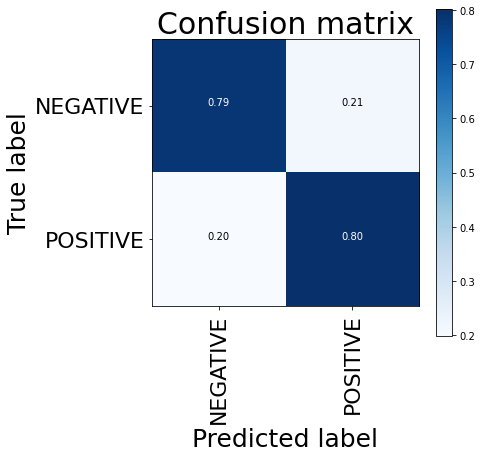

CPU times: user 1.18 s, sys: 38.9 ms, total: 1.22 s
Wall time: 1.21 s


In [219]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.savefig('conf_mat_160K.png', bbox_inches='tight')
plt.show()


In [220]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.79      0.79    159814
    POSITIVE       0.79      0.80      0.80    160186

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [179]:
accuracy_score(y_test_1d, y_pred_1d)

0.789409375

In [229]:
# model_dist.save("best_model.pkl")